# Proyek Analisis Data [Bike Sharing Dataset]

- **Nama:** [ Ahmad Fuad Fauzi]
- **Email:** [ahmadfuadfauzi13@gmail.com]
- **ID Dicoding:** [ahmadfuadfauzi]

## Menentukan pertanyaan Bisnis

- Apakah kondisi cuaca memengaruhi penyewaan sepeda untuk pengguna kasual dan terdaftar?
- Apakah kondisi musim memengaruhi penyewaan sepeda
- Apakah ada perbedaan yang signifikan dalam jumlah penyewaan antara hari kerja dan akhir pekan?
- Pada Jam berapa penyewaan sepeda paling ramai?

## Import Semua Packages/Library yang Digunakan

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import f_oneway

print("numpy", np.__version__)
print("pandas", pd.__version__)
print("matplotlib", plt.matplotlib.__version__)
print("seaborn", sns.__version__)
print("scipy", scipy.__version__)

numpy 1.26.4
pandas 2.2.2
matplotlib 3.8.0
seaborn 0.13.2
scipy 1.13.1


## Data Gathering

In [122]:
#membaca day.csv
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [123]:
#membaca hour.csv
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Deskripsi kolom**
- instant: Nomor urut baris.
- dteday: Tanggal data diambil.
- season: Musim dalam bentuk angka (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin).
- yr: Tahun, 0 untuk 2011 dan 1 untuk 2012.
- mnth: Bulan dari 1 hingga 12.
- hr: Jam dalam format 24 jam.
- holiday: 1 jika hari tersebut libur, 0 jika bukan libur.
- weekday: Hari dalam minggu, di mana 0 = Minggu, 1 = Senin, dan seterusnya.
- workingday: 1 jika hari kerja (bukan libur), 0 jika tidak.
- weathersit: Kondisi cuaca dalam kode numerik (1 = cerah, 2 = berkabut, 3 = - - hujan ringan, 4 = hujan lebat).
- temp: Suhu aktual dalam skala 0 hingga 1.
- atemp: Suhu "feels like" atau suhu yang dirasakan.
- hum: Kelembapan dalam skala 0 hingga 1.
- windspeed: Kecepatan angin dalam skala 0 hingga 1.
- casual: Jumlah pengguna casual (tanpa registrasi).
- registered: Jumlah pengguna terdaftar.
- cnt: Jumlah total penyewaan sepeda.

## Data Wrangling

### Data Assessing

In [124]:
#informasi kolom day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [125]:
#cek duplikat data
day_df.duplicated().sum()

0

In [126]:
#statistik deskriptif
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [127]:
#membuat fungsi pengecekan outlier agar tidak konflik penamaan dan fleksibilitas jika nantinya banyak kolom yang dicheck
def check_outlier(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers.shape[0]

    print(f'Jumlah outlier pada kolom {column} adalah {outliers.shape[0]}')
    print(f'Persentase outlier pada kolom {column} adalah {round((outliers.shape[0] / df.shape[0]) * 100, 2)}%')
    print(f'Nilai lower bound pada kolom {column} adalah {round(lower_bound, 2)}')
    print(f'Nilai upper bound pada kolom {column} adalah {round(upper_bound, 2)}')
    print('='*30)
    return outliers.sort_values(by=column, ascending=False)

In [128]:
#cek outlier 'casual'
check_outlier(day_df, 'casual')

Jumlah outlier pada kolom casual adalah 44
Persentase outlier pada kolom casual adalah 6.02%
Nilai lower bound pada kolom casual adalah -855.25
Nilai upper bound pada kolom casual adalah 2266.75


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
504,505,2012-05-19,2,1,5,0,6,0,1,0.600000,0.566908,0.456250,0.083975,3410,4884,8294
512,513,2012-05-27,2,1,5,0,0,0,1,0.690000,0.641425,0.697083,0.215171,3283,3308,6591
462,463,2012-04-07,2,1,4,0,6,0,1,0.437500,0.426129,0.254167,0.274871,3252,3605,6857
623,624,2012-09-15,3,1,9,0,6,0,1,0.608333,0.585867,0.501667,0.247521,3160,5554,8714
441,442,2012-03-17,1,1,3,0,6,0,2,0.514167,0.505046,0.755833,0.110704,3155,4681,7836
184,185,2011-07-04,3,0,7,1,1,0,2,0.726667,0.665417,0.637917,0.081479,3065,2978,6043
644,645,2012-10-06,4,1,10,0,6,0,1,0.554167,0.538521,0.664167,0.268025,3031,4934,7965
532,533,2012-06-16,2,1,6,0,6,0,1,0.631667,0.594708,0.504167,0.166667,2963,4739,7702
511,512,2012-05-26,2,1,5,0,6,0,1,0.692500,0.642696,0.732500,0.198992,2855,3681,6536
470,471,2012-04-15,2,1,4,0,0,0,1,0.606667,0.573875,0.507917,0.225129,2846,4286,7132


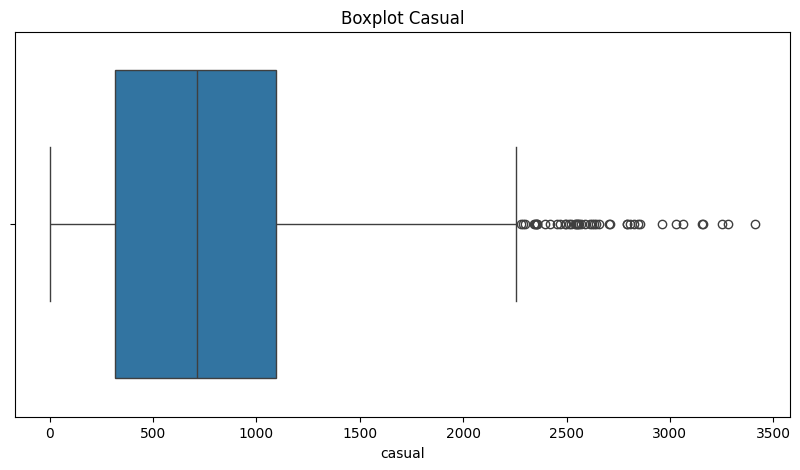

In [129]:
#membuat boxplot untuk mengidentifikasi outlier pada kolom casual
plt.figure(figsize=(10,5))
sns.boxplot(x=day_df['casual'])
plt.title('Boxplot Casual')
plt.show()

In [130]:
#info hours_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [131]:
#cek duplikat data hour_df
hour_df.duplicated().sum()

0

In [132]:
#statistik deskriptif
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [133]:
#identifikasi outlier kolom 'casual',' 'registered' dan 'cnt'
for column in ['casual', 'registered', 'cnt']:
    check_outlier(hour_df, column)

Jumlah outlier pada kolom casual adalah 1192
Persentase outlier pada kolom casual adalah 6.86%
Nilai lower bound pada kolom casual adalah -62.0
Nilai upper bound pada kolom casual adalah 114.0
Jumlah outlier pada kolom registered adalah 680
Persentase outlier pada kolom registered adalah 3.91%
Nilai lower bound pada kolom registered adalah -245.0
Nilai upper bound pada kolom registered adalah 499.0
Jumlah outlier pada kolom cnt adalah 505
Persentase outlier pada kolom cnt adalah 2.91%
Nilai lower bound pada kolom cnt adalah -321.5
Nilai upper bound pada kolom cnt adalah 642.5


**Insight day_df**
- Dataset berisi 731 baris dan 16 kolom
- Dataset tidak memiliki nilai null, karena jumlah data non-null setiap kolom = total baris
- tipe data pada kolom dteday: object, kemungkinan tidak akurat, seharusnya bertipe datatime
- ukuran memori 91.5+ KB
- dataset tidak memiliki duplikat data
- setelah diidentifikasi ada 44 data outlier pada kolom casual

**Insight hour_df**

- Dataset berisi 17379 baris dan 17 kolom
- Dataset tidak memiliki nilai null, karena jumlah data non-null setiap kolom = total baris
- tipe data pada kolom dteday: object, kemungkinan tidak akurat, seharusnya bertipe datatime
- ukuran memori 2.3+ MB
- outliers
  - outlier pada kolom casual adalah 1192
  - Jumlah outlier pada kolom registered adalah 680
  - Jumlah outlier pada kolom cnt adalah 505

### Data Cleaning (day_df)

In [134]:
#konversi obj ke datetime pada kolom dteday
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.dteday.info()

<class 'pandas.core.series.Series'>
RangeIndex: 731 entries, 0 to 730
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
731 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.8 KB


In [135]:
#fungsi penghapusan outlier
def remove_outlier(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [136]:
day_df_clean = remove_outlier(day_df, 'casual')

In [137]:
#cek apakah masih ada outlier
check_outlier(day_df_clean, 'casual')

Jumlah outlier pada kolom casual adalah 16
Persentase outlier pada kolom casual adalah 2.33%
Nilai lower bound pada kolom casual adalah -802.25
Nilai upper bound pada kolom casual adalah 2123.75


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
140,141,2011-05-21,2,0,5,0,6,0,1,0.602500,0.571975,0.626667,0.120650,2258,3547,5805
651,652,2012-10-13,4,1,10,0,6,0,1,0.393333,0.391396,0.494583,0.146142,2252,4857,7109
588,589,2012-08-11,3,1,8,0,6,0,2,0.692500,0.638267,0.732917,0.206479,2247,4052,6299
280,281,2011-10-08,4,0,10,0,6,0,1,0.521667,0.513242,0.701250,0.045404,2235,3174,5409
574,575,2012-07-28,3,1,7,0,6,0,1,0.755833,0.697604,0.613333,0.157350,2234,4451,6685
463,464,2012-04-08,2,1,4,0,0,0,1,0.500000,0.492425,0.275833,0.232596,2230,2939,5169
484,485,2012-04-29,2,1,4,0,0,0,1,0.458333,0.450121,0.587083,0.116908,2229,4075,6304
526,527,2012-06-10,2,1,6,0,0,0,1,0.726667,0.663517,0.538333,0.133721,2224,4374,6598
442,443,2012-03-18,1,1,3,0,0,0,2,0.472500,0.464000,0.810000,0.126883,2207,3685,5892
182,183,2011-07-02,3,0,7,0,6,0,1,0.738333,0.667308,0.444583,0.115062,2204,2915,5119


In [138]:
#menghapus outliers tersisa
day_df_clean = remove_outlier(day_df_clean, 'casual')

#cek apakah masih ada outliers tersisa
check_outlier(day_df_clean, 'casual')

Jumlah outlier pada kolom casual adalah 2
Persentase outlier pada kolom casual adalah 0.3%
Nilai lower bound pada kolom casual adalah -789.5
Nilai upper bound pada kolom casual adalah 2070.5


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
679,680,2012-11-10,4,1,11,0,6,0,1,0.389167,0.393937,0.645417,0.057846,2090,4446,6536
652,653,2012-10-14,4,1,10,0,0,0,1,0.521667,0.508204,0.640417,0.278612,2080,4559,6639


In [139]:
#menghapus outlier yang tersisa
day_df_clean = remove_outlier(day_df_clean, 'casual')

#cek apakah masih ada outliers tersisa
check_outlier(day_df_clean, 'casual')

Jumlah outlier pada kolom casual adalah 0
Persentase outlier pada kolom casual adalah 0.0%
Nilai lower bound pada kolom casual adalah -790.5
Nilai upper bound pada kolom casual adalah 2069.5


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


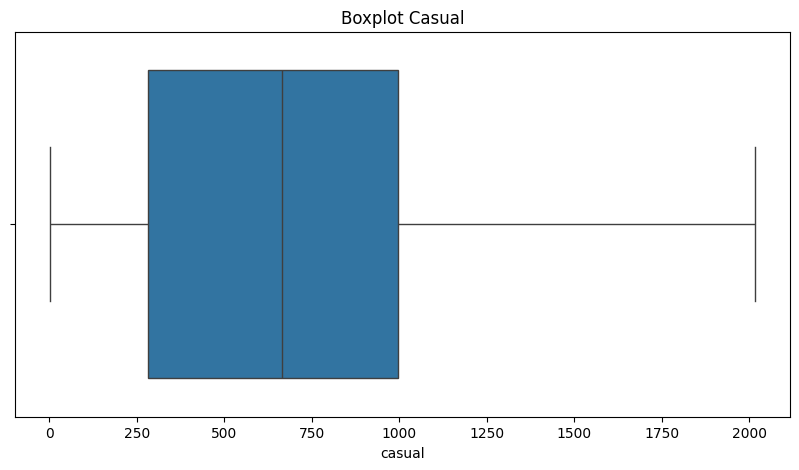

In [140]:
#cek dengan visualisasi
plt.figure(figsize=(10,5))
sns.boxplot(x=day_df_clean['casual'])
plt.title('Boxplot Casual')
plt.show()

In [141]:
outlier_terhapus = day_df.shape[0] - day_df_clean.shape[0]
percentage_outlier_terhapus = (outlier_terhapus / day_df.shape[0]) * 100
print(f'Total baris yang terhapus adalah {outlier_terhapus}')
print(f'Persentase baris yang terhapus adalah {round(percentage_outlier_terhapus, 2)}%')

Total baris yang terhapus adalah 62
Persentase baris yang terhapus adalah 8.48%


In [142]:
#mengubah yr 0 menjadi 2011 dan yr 1 menjadi 2012
day_df_clean['yr'] = day_df_clean['yr'].replace({0: 2011, 1: 2012})

#mengubah mnth 1-12 menjadi nama bulan
day_df_clean['mnth'] = day_df_clean['mnth'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep',10: 'Oct', 11: 'Nov', 12: 'Dec'})

#mengubah season 1-4 menjadi nama musim
day_df_clean['season'] = day_df_clean['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

#mengubah weekday 0-6 menjadi nama hari
day_df_clean['weekday'] = day_df_clean['weekday'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

#mengubah weathersit 1 - 4 menjadi cuaca
day_df_clean['weathersit'] = day_df_clean['weathersit'].replace({1: 'Clear', 2: 'Cloudy', 3: 'Light Rain', 4: 'Heavy Rain'})

day_df_clean.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,Saturday,0,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sunday,0,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Data Cleaning (hour_df)

In [143]:
#konversi tipe data object ke datetime pada 'dteday'
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.dteday.info()

<class 'pandas.core.series.Series'>
RangeIndex: 17379 entries, 0 to 17378
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
17379 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 135.9 KB


In [144]:
#menghapus outlier pada hour_df
hour_df_clean = remove_outlier(hour_df, 'cnt')

#cek apakah masih ada outlier
check_outlier(hour_df_clean, 'cnt')

Jumlah outlier pada kolom cnt adalah 134
Persentase outlier pada kolom cnt adalah 0.79%
Nilai lower bound pada kolom cnt adalah -303.62
Nilai upper bound pada kolom cnt adalah 607.38


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
12709,12710,2012-06-18,2,1,6,18,0,1,1,2,0.62,0.6061,0.69,0.1642,47,595,642
11983,11984,2012-05-19,2,1,5,12,0,6,0,1,0.66,0.6212,0.36,0.0000,276,366,642
11987,11988,2012-05-19,2,1,5,16,0,6,0,1,0.74,0.6515,0.30,0.1045,331,311,642
15493,15494,2012-10-12,4,1,10,18,0,5,1,1,0.44,0.4394,0.38,0.2985,76,566,642
14171,14172,2012-08-18,3,1,8,16,0,6,0,1,0.76,0.6667,0.37,0.2537,287,354,641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5516,5517,2011-08-22,3,0,8,18,0,1,1,1,0.72,0.6515,0.28,0.2985,72,537,609
11310,11311,2012-04-21,2,1,4,11,0,6,0,1,0.62,0.6061,0.61,0.3284,260,348,608
5718,5719,2011-08-31,3,0,8,17,0,3,1,1,0.72,0.6515,0.45,0.1343,83,525,608
16223,16224,2012-11-13,4,1,11,17,0,2,1,1,0.34,0.3030,0.49,0.3582,33,575,608


In [145]:
#menghapus outlier yang tersisa
hour_df_clean = remove_outlier(hour_df_clean, 'cnt')

#cek apakah masih ada outliers tersisa
check_outlier(hour_df_clean, 'cnt')

Jumlah outlier pada kolom cnt adalah 33
Persentase outlier pada kolom cnt adalah 0.2%
Nilai lower bound pada kolom cnt adalah -299.0
Nilai upper bound pada kolom cnt adalah 597.0


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
12008,12009,2012-05-20,2,1,5,13,0,0,0,1,0.70,0.6364,0.37,0.2836,244,363,607
3884,3885,2011-06-15,2,0,6,18,0,3,1,1,0.72,0.6515,0.32,0.1343,80,527,607
13790,13791,2012-08-02,3,1,8,19,0,4,1,1,0.80,0.7879,0.63,0.1642,98,509,607
13117,13118,2012-07-05,3,1,7,18,0,4,1,2,0.90,0.8333,0.39,0.3284,96,511,607
10790,10791,2012-03-30,2,1,3,17,0,5,1,2,0.40,0.4091,0.62,0.2239,93,513,606
16146,16147,2012-11-10,4,1,11,12,0,6,0,1,0.48,0.4697,0.48,0.0000,258,348,606
16150,16151,2012-11-10,4,1,11,16,0,6,0,1,0.54,0.5152,0.37,0.0000,227,378,605
16750,16751,2012-12-05,4,1,12,17,0,3,1,1,0.44,0.4394,0.35,0.2836,29,576,605
13875,13876,2012-08-06,3,1,8,8,0,1,1,2,0.70,0.6667,0.79,0.0000,27,578,605
10812,10813,2012-03-31,2,1,3,15,0,6,0,2,0.52,0.5000,0.59,0.2836,275,330,605


In [146]:
#menghapus outlier yang tersisa
hour_df_clean = remove_outlier(hour_df_clean, 'cnt')

#cek apakah masih ada outliers tersisa
check_outlier(hour_df_clean, 'cnt')

Jumlah outlier pada kolom cnt adalah 17
Persentase outlier pada kolom cnt adalah 0.1%
Nilai lower bound pada kolom cnt adalah -297.5
Nilai upper bound pada kolom cnt adalah 594.5


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
10263,10264,2012-03-08,1,1,3,17,0,4,1,1,0.62,0.6212,0.38,0.6567,52,545,597
15513,15514,2012-10-13,4,1,10,14,0,6,0,1,0.48,0.4697,0.33,0.1940,243,354,597
11187,11188,2012-04-16,2,1,4,8,1,1,0,2,0.56,0.5303,0.83,0.1642,48,549,597
14414,14415,2012-08-28,3,1,8,19,0,2,1,1,0.74,0.6667,0.45,0.1642,82,515,597
4387,4388,2011-07-06,3,0,7,17,0,3,1,1,0.78,0.7424,0.59,0.2239,79,517,596
14170,14171,2012-08-18,3,1,8,15,0,6,0,1,0.76,0.6667,0.37,0.2239,250,346,596
14867,14868,2012-09-16,3,1,9,16,0,0,0,1,0.64,0.6212,0.44,0.1642,194,402,596
14750,14751,2012-09-11,3,1,9,19,0,2,1,1,0.62,0.6212,0.41,0.1940,56,540,596
14738,14739,2012-09-11,3,1,9,7,0,2,1,1,0.50,0.4848,0.72,0.1045,24,572,596
12542,12543,2012-06-11,2,1,6,19,0,1,1,2,0.76,0.6818,0.48,0.3284,89,507,596


In [147]:
#menghapus outlier yang tersisa
hour_df_clean = remove_outlier(hour_df_clean, 'cnt')

#cek apakah masih ada outliers tersisa
check_outlier(hour_df_clean, 'cnt')

Jumlah outlier pada kolom cnt adalah 12
Persentase outlier pada kolom cnt adalah 0.07%
Nilai lower bound pada kolom cnt adalah -296.0
Nilai upper bound pada kolom cnt adalah 592.0


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
3067,3068,2011-05-12,2,0,5,17,0,4,1,2,0.64,0.6212,0.57,0.1940,54,540,594
4243,4244,2011-06-30,3,0,6,17,0,4,1,1,0.78,0.6818,0.27,0.3582,98,496,594
10086,10087,2012-03-01,1,1,3,8,0,4,1,1,0.42,0.4242,0.94,0.1343,15,579,594
15181,15182,2012-09-29,4,1,9,18,0,6,0,1,0.56,0.5303,0.46,0.1940,174,420,594
15200,15201,2012-09-30,4,1,9,13,0,0,0,1,0.62,0.6212,0.41,0.2537,180,414,594
6556,6557,2011-10-05,4,0,10,18,0,3,1,1,0.60,0.6212,0.53,0.1642,57,536,593
10373,10374,2012-03-13,1,1,3,8,0,2,1,1,0.46,0.4545,0.82,0.2836,22,571,593
10781,10782,2012-03-30,2,1,3,8,0,5,1,1,0.32,0.3182,0.66,0.1642,38,555,593
12489,12490,2012-06-09,2,1,6,14,0,6,0,1,0.82,0.6970,0.23,0.1940,239,354,593
12660,12661,2012-06-16,2,1,6,17,0,6,0,2,0.72,0.6515,0.37,0.2537,244,349,593


In [148]:
#menghapus outlier yang tersisa
hour_df_clean = remove_outlier(hour_df_clean, 'cnt')

#cek apakah masih ada outliers tersisa
check_outlier(hour_df_clean, 'cnt')

Jumlah outlier pada kolom cnt adalah 0
Persentase outlier pada kolom cnt adalah 0.0%
Nilai lower bound pada kolom cnt adalah -296.0
Nilai upper bound pada kolom cnt adalah 592.0


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [149]:
#menghitung outlier yang terhapus
outlier_terhapus = hour_df.shape[0] - hour_df_clean.shape[0]
percentage_outlier_terhapus = (outlier_terhapus / hour_df.shape[0]) * 100
print(f'Total baris yang terhapus adalah {outlier_terhapus}')
print(f'Persentase baris yang terhapus adalah {round(percentage_outlier_terhapus, 2)}%')

Total baris yang terhapus adalah 701
Persentase baris yang terhapus adalah 4.03%


In [150]:
#mengubah yr 0 menjadi 2011 dan yr 1 menjadi 2012
hour_df_clean['yr'] = hour_df_clean['yr'].replace({0: 2011, 1: 2012})

#mengubah mnth 1-12 menjadi nama bulan
hour_df_clean['mnth'] = hour_df_clean['mnth'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep',10: 'Oct', 11: 'Nov', 12: 'Dec'})

#mengubah season 1-4 menjadi nama musim
hour_df_clean['season'] = hour_df_clean['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

#mengubah weekday 0-6 menjadi nama hari
hour_df_clean['weekday'] = hour_df_clean['weekday'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

#mengubah weathersit 1 - 4 menjadi cuaca
hour_df_clean['weathersit'] = hour_df_clean['weathersit'].replace({1: 'Clear', 2: 'Cloudy', 3: 'Light Rain', 4: 'Heavy Rain'})

hour_df_clean.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


**Documentation cleaning day_df**

- Mengkonversi object to datetime pada 'dteday'
- menghapus outlier
  - menghapus 44 outlier pada 'casual'
  - menghapus 16 outlier tersisa
  - menghapus 2 outlier **tersisa**
  ***total 62 baris terhapus (8.48)**

**Documentation cleaning day_df**
- Mengkonversi object to datetime pada 'dteday'
- menghapus outlier
  - menghapus 1192 outlier pada 'casual'
  - menghapus 134 outlier tersisa
  - menghapus 33 outlier tersisa
  - menghapus 17 outlier tersisa
  - menghapus 12 outlier tersisa
  ***total 701 baris terhapus (4.03%)**

**Replace kolom pada kedua dataset**
  - mengubah 0,1 menjadi 2011,2022
  - mengubah mnth 1-12 menjadi nama bulan
  - mengubah 0 - 6 menjadi nama hari
  - mengubah season 1 - 4 menjadi nama musim
  - mengubah weathersit 1 - 4 menjadi nama cuaca


## Exploratory Data Analysis (EDA)

In [151]:
#statistik deskriptif
day_df_clean.describe()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,669.000000,669,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000
mean,353.328849,2011-12-19 07:53:32.556053760,2011.467862,0.026906,0.745889,0.485024,0.464981,0.629903,0.192286,692.766816,3595.376682,4288.143498
min,1.000000,2011-01-01 00:00:00,2011.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,170.000000,2011-06-19 00:00:00,2011.000000,0.000000,0.000000,0.325217,0.324479,0.520000,0.135571,282.000000,2415.000000,2927.000000
50%,344.000000,2011-12-10 00:00:00,2011.000000,0.000000,1.000000,0.470000,0.462742,0.630833,0.182213,665.000000,3578.000000,4339.000000
75%,537.000000,2012-06-20 00:00:00,2012.000000,0.000000,1.000000,0.650000,0.603554,0.734167,0.235075,997.000000,4721.000000,5499.000000
max,731.000000,2012-12-31 00:00:00,2012.000000,1.000000,1.000000,0.861667,0.840896,0.972500,0.507463,2015.000000,6946.000000,8173.000000
std,212.157677,NaN,0.499339,0.161929,0.435686,0.185233,0.165171,0.144338,0.078557,469.336360,1596.133881,1860.441163


In [152]:
#mengidentifikasi jumlah penyewaan by musim
season_rent = day_df_clean.groupby('season').agg({
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean'
})
season_rent.sort_values(by='cnt', ascending=False)

,cnt,casual,registered
season,,,
Fall,5499.343373,1033.560241,4465.783133
Summer,4695.525316,859.791139,3835.734177
Winter,4556.409639,607.126506,3949.283133
Spring,2556.536313,308.715084,2247.821229


In [153]:
#mengidentifikasi jumlah penyewaan by cuaca
weather_rent = day_df_clean.groupby('weathersit').agg({
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean'
})
weather_rent.sort_values(by='cnt', ascending=False)

,cnt,casual,registered
weathersit,,,
Clear,4646.204327,786.060096,3860.144231
Cloudy,3871.025862,571.400862,3299.625000
Light Rain,1803.285714,185.476190,1617.809524


In [154]:
#menambahkan kolom baru jenis hari senin - jumat = weekdays, sabtu dan minggu = weekends
day_df_clean['day_type'] = day_df_clean['weekday'].apply(lambda x: 'weekdays' if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 'weekends')
day_df_clean.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_type
0,1,2011-01-01,Spring,2011,Jan,0,Saturday,0,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,weekends
1,2,2011-01-02,Spring,2011,Jan,0,Sunday,0,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801,weekends
2,3,2011-01-03,Spring,2011,Jan,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349,weekdays
3,4,2011-01-04,Spring,2011,Jan,0,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562,weekdays
4,5,2011-01-05,Spring,2011,Jan,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600,weekdays


In [155]:
#rata-rata penyewaan by weekday
day_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
weekday_rent = day_df_clean.groupby('weekday').agg({
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean'
})
weekday_rent = weekday_rent.reindex(day_order)
weekday_rent.sort_values(by='cnt', ascending=False)

,cnt,casual,registered
weekday,,,
Thursday,4667.259615,590.961538,4076.298077
Friday,4654.640777,735.621359,3919.019417
Wednesday,4520.825243,531.621359,3989.203883
Tuesday,4510.663462,556.182692,3954.480769
Monday,4305.019417,632.640777,3672.378641
Saturday,3467.851351,983.027027,2484.824324
Sunday,3450.679487,970.846154,2479.833333


In [156]:
#rata-rata penyewaan by day_type
day_type_rent = day_df_clean.groupby('day_type').agg({
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean'
})
day_type_rent.sort_values(by='cnt', ascending=False)

,cnt,casual,registered
day_type,,,
weekdays,4531.903288,609.266925,3922.636364
weekends,3459.039474,976.776316,2482.263158


In [157]:
#identifikasi jam prime time
time_rent = hour_df_clean.groupby('hr').agg({
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean'
})
time_rent.sort_values(by='cnt', ascending=False)

,cnt,casual,registered
hr,,,
17,350.399621,63.742424,286.657197
18,337.635889,53.167247,284.468641
16,300.797737,67.336634,233.461103
19,293.166909,46.349782,246.817126
8,264.558304,19.118375,245.439929
12,237.409415,61.194009,176.215407
15,236.894886,67.610795,169.284091
13,234.182471,62.972701,171.209770
20,226.030220,36.233516,189.796703


**Insight:**

* Rata-rata jumlah sepeda yang disewa (cnt) adalah sekitar 4288 sepeda per hari, dengan nilai minimum 22 dan maksimum 8173 sepeda.
* Kolom temp (temperatur berskala 0 hingga 1) memiliki nilai rata-rata 0.485, sedangkan kolom hum (kelembaban) memiliki rata-rata 0.63.
* Jumlah pengguna terdaftar (registered) lebih tinggi dibandingkan pengguna tidak terdaftar (casual), dengan rata-rata 3595 pengguna terdaftar dan 692 pengguna tidak terdaftar per hari.
* Windspeed: Rata-rata nilai kecepatan angin adalah 0.19, dengan nilai tertinggi 0.5
* Musim gugur memiliki rata-rata penyewaan tertinggi pada 2 tahun terahir yaitu 5.499 penyewaan
* Cuaca cerah memiliki rata-rata penyewaan tertinggi pada 2 tahun terahir yaitu 4.646
* weekdays memiliki rata-rata penyewaan tertunggi pada 2 tahunn terahir yaitu 4.531 penyewaan
* Jam prime time penyewaan ada pada jam 17.00 dengan rata rata penyewaan 350

## Visualization dan explanatory analytics

### Pertanyaan 1
- Apakah kondisi cuaca memengaruhi penyewaan sepeda untuk pengguna kasual dan terdaftar?

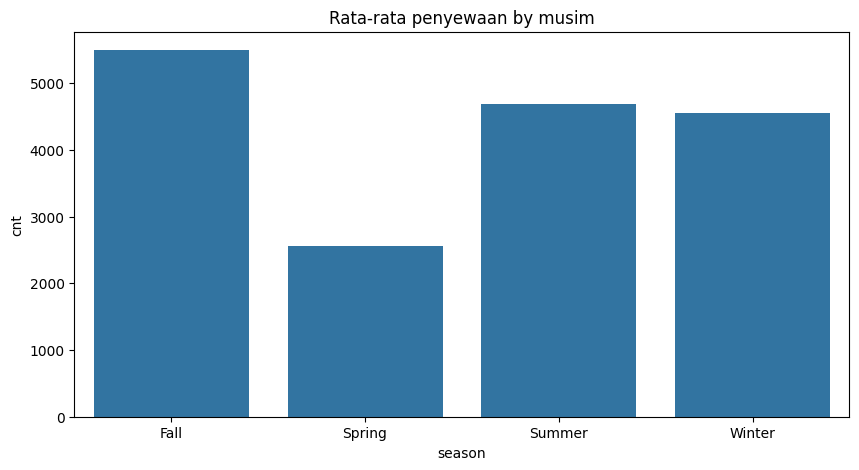

In [158]:
#visualisasi penyewaan by musim
plt.figure(figsize=(10,5))
sns.barplot(x=season_rent.index, y=season_rent['cnt'])
plt.title('Rata-rata penyewaan by musim')
plt.show()

In [159]:
#persebaran rental masing masing season
fall_rentals = day_df_clean[day_df_clean['season'] =="Fall"]['cnt']
winter_rentals = day_df_clean[day_df_clean['season'] =="Winter"]['cnt']
summer_rentals = day_df_clean[day_df_clean['season'] =="Summer"]['cnt']
spring_rentals = day_df_clean[day_df_clean['season'] =="Spring"]['cnt']

#perform ANOVA
f_statistic, p_value = f_oneway(fall_rentals, winter_rentals, summer_rentals, spring_rentals)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 121.45434655044642
P-value: 9.96905522394861e-63


### Pertanyaan 2
- Apakah kondisi musim memengaruhi penyewaan sepeda

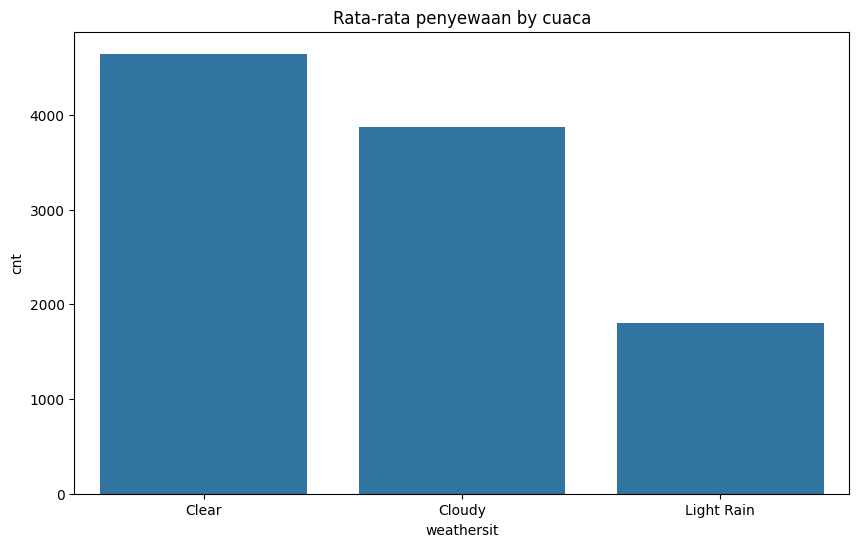

In [160]:
#visualisasi penyewaan sepeda by musim
plt.figure(figsize=(10,6))
sns.barplot(x=weather_rent.index, y=weather_rent['cnt'])
plt.title('Rata-rata penyewaan by cuaca')
plt.show()

In [161]:
#persebaran rental masing masing cuaca
clear_rentals = day_df_clean[day_df_clean['weathersit'] =="Clear"]['cnt']
cloudy_rentals = day_df_clean[day_df_clean['weathersit'] =="Cloudy"]['cnt']
light_rain_rentals = day_df_clean[day_df_clean['weathersit'] =="Light Rain"]['cnt']
heavy_rain_rentals = day_df_clean[day_df_clean['weathersit'] =="Heavy Rain"]['cnt']

#perform ANOVA
f_statistic, p_value = f_oneway(clear_rentals, cloudy_rentals, light_rain_rentals)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 35.61003985554799
P-value: 2.027988527775041e-15


### Pertanyaan 3
- Apakah ada perbedaan yang signifikan dalam jumlah penyewaan antara hari kerja dan akhir pekan?

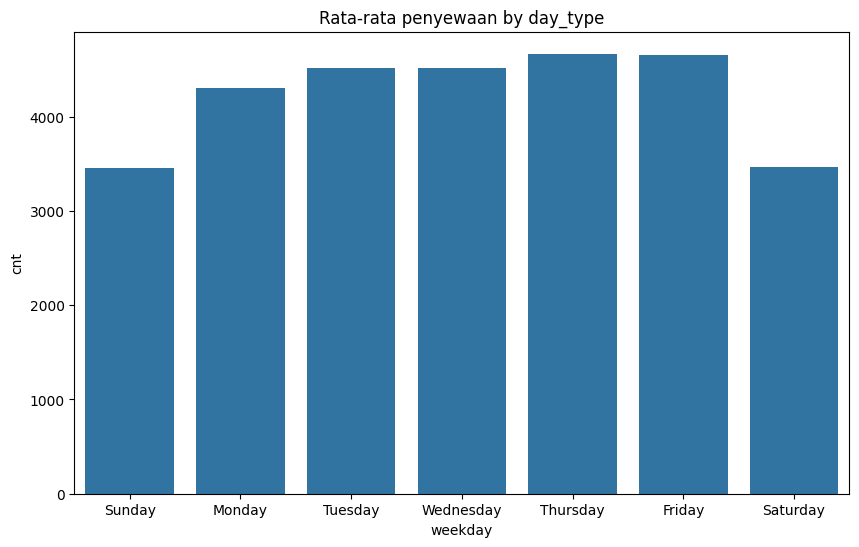

In [162]:
#visualisasi penyewaan sepeda by day_type
plt.figure(figsize=(10,6))
sns.barplot(x=weekday_rent.index, y=weekday_rent['cnt'])
plt.title('Rata-rata penyewaan by day_type')
plt.show()

Text(0.5, 1.0, 'Rata-rata penyewaan by day_type')

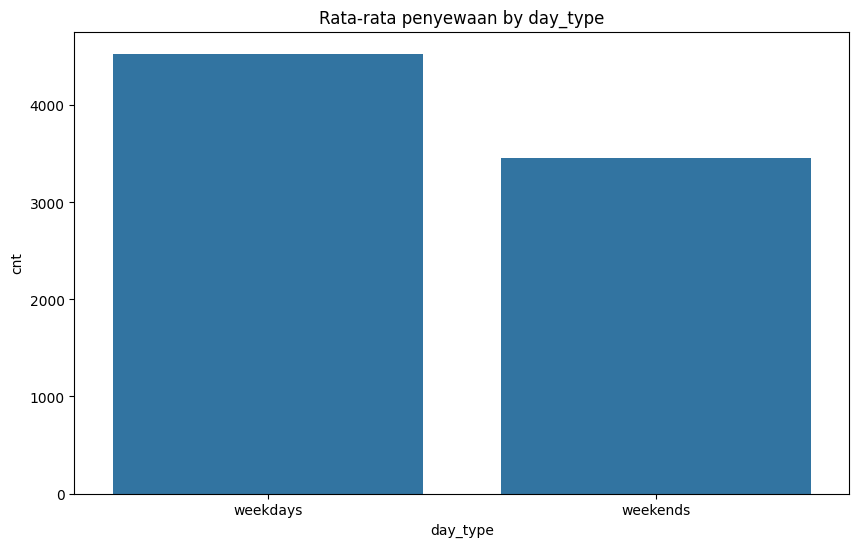

In [163]:
#visualisasi berdasarkan nama hari
plt.figure(figsize=(10,6))
sns.barplot(x=day_type_rent.index, y=day_type_rent['cnt'])
plt.title('Rata-rata penyewaan by day_type')

In [164]:
#persebaran rental masing-masing weekdays
weekdays_rentals = day_df_clean[day_df_clean['day_type'] =="weekdays"]['cnt']
weekends_rentals = day_df_clean[day_df_clean['day_type'] =="weekends"]['cnt']

#perform ANOVA
f_statistic, p_value = f_oneway(weekdays_rentals, weekends_rentals)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 41.42704934205543
P-value: 2.338132159985555e-10


### Pertanyaan 4
- Pada Jam berapa penyewaan sepeda paling ramai?

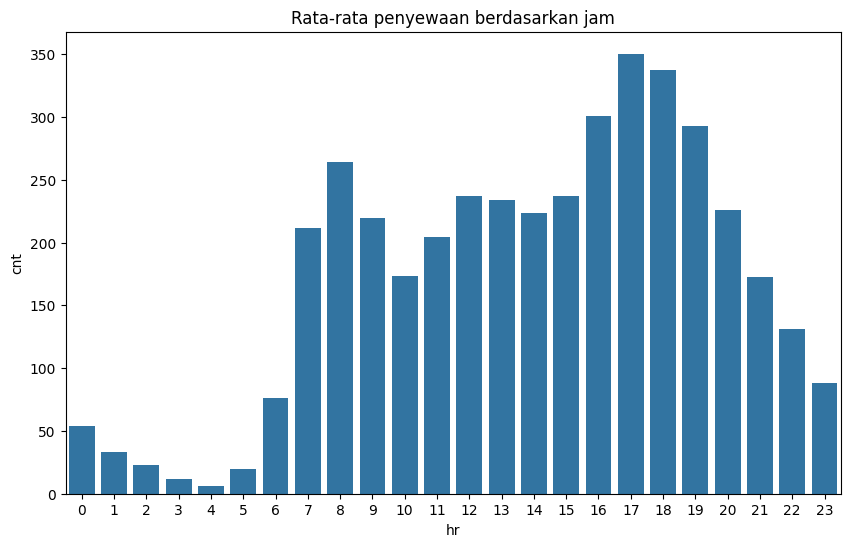

In [165]:
#visualisasi rata rata penyewaan berdasarkan jam
plt.figure(figsize=(10,6))
sns.barplot(x=time_rent.index, y=time_rent['cnt'])
plt.title('Rata-rata penyewaan berdasarkan jam')
plt.show()

**Pertanyaan 1**

Karena p-value sangat kecil (jauh di bawah ambang batas umum 0.05), ini menunjukkan bahwa ada perbedaan yang signifikan dalam jumlah penyewaan berdasarkan musim. Dengan kata lain, musim memang memiliki pengaruh yang signifikan terhadap jumlah penyewaan.

**Pertanyaan 2**
Karena p-value sangat kecil (jauh di bawah ambang batas umum 0.05), ini menunjukkan bahwa ada perbedaan yang signifikan dalam jumlah penyewaan berdasarkan cuaca. Dengan kata lain, cuaca memang memiliki pengaruh yang signifikan terhadap jumlah penyewaan.

**Pertanyaan 3**
Karena p-value sangat kecil (jauh di bawah ambang batas umum 0.05), ini menunjukkan bahwa ada perbedaan yang signifikan dalam jumlah penyewaan berdasarkan jenis hari (weekdays dan weekend). Dengan kata lain, jenis hari (weekdays dan weekend) memang memiliki pengaruh yang signifikan terhadap jumlah penyewaan.

**Pertanyaan 4**
jam 4 sore hingga jam 7 malam adalah rentang jam yang memiliki penyewaan paling tinggi

### Analisis lanjutan
 Analisa tren penyewaan masing masing tahun

In [166]:
hour_df_clean.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


<ipython-input-175-4312caf53365>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_trend = hour_df_clean.groupby(['mnth', 'yr'])['cnt'].sum().reset_index()


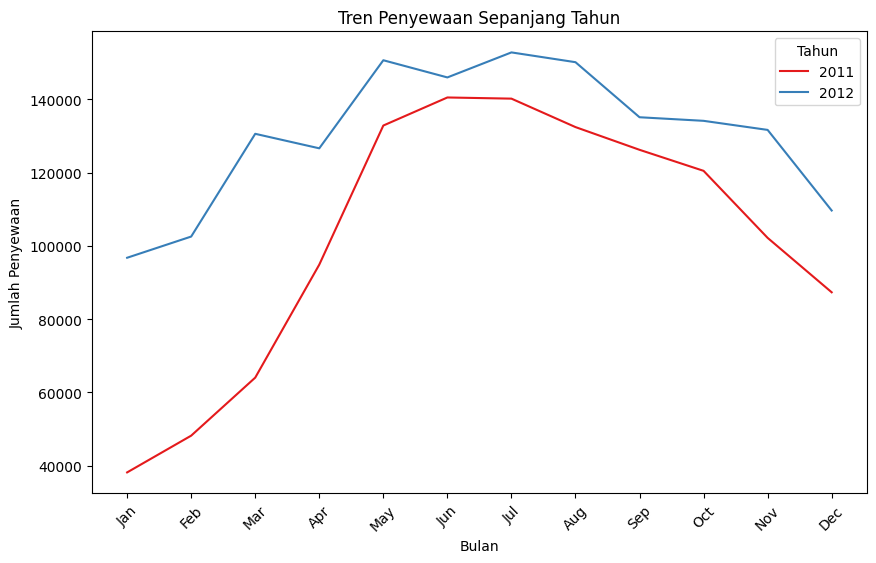

In [175]:
#membuat urutan bulan
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Mengonversi kolom 'mnth' menjadi tipe kategori dengan urutan bulan
hour_df_clean['mnth'] = pd.Categorical(hour_df_clean['mnth'], categories=month_order, ordered=True)
monthly_trend = hour_df_clean.groupby(['mnth', 'yr'])['cnt'].sum().reset_index()

#memvisualisasikan
plt.figure(figsize=(10,6))
sns.lineplot(x='mnth', y='cnt', hue='yr', data=monthly_trend, palette='Set1')
plt.title('Tren Penyewaan Sepanjang Tahun')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.legend(title='Tahun')
plt.show()

**Analisis tambahan**
- Jumlah penyewaan sepeda pada tahun kedua secara konsisten lebih tinggi dibandingkan dengan tahun pertama.
- Pada awal tahun (Januari hingga Maret) dan selama musim puncak (Mei hingga Agustus), terjadi peningkatan yang signifikan.
- Pada akhir tahun jumlah penyewaan secara konsisten menurun.

## Conclution

Kesimpulan:
- Pengaruh Musim terhadap Penyewaan: Berdasarkan uji ANOVA, perbedaan jumlah penyewaan sepeda berdasarkan musim sangat signifikan. Musim tertentu (misalnya musim panas) mungkin lebih menguntungkan dibandingkan musim lainnya, yang mempengaruhi jumlah penyewaan sepeda.

- Pengaruh Cuaca terhadap Penyewaan: Cuaca juga memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda. Pada kondisi cuaca cerah, jumlah penyewaan lebih tinggi, sedangkan pada cuaca buruk (seperti hujan) jumlah penyewaan cenderung lebih rendah.

- Pengaruh Jenis Hari (Weekdays vs. Weekend): Ada perbedaan signifikan dalam jumlah penyewaan antara weekdays dan weekend. Jumlah penyewaan cenderung lebih tinggi pada akhir pekan, yang menunjukkan bahwa pengguna cenderung lebih banyak menyewa sepeda untuk kegiatan rekreasi atau aktivitas di luar rumah selama akhir pekan.

- Waktu Penyewaan Paling Tinggi: Rentang waktu antara jam 4 sore hingga 7 malam menunjukkan jumlah penyewaan tertinggi, yang mungkin berkaitan dengan waktu pulang kerja atau aktivitas sore lainnya.

- Tren Penyewaan Tahunan: Penyewaan pada tahun kedua lebih tinggi dibandingkan tahun pertama, dengan puncak pada awal tahun dan musim puncak (Mei hingga Agustus). Sebaliknya, penyewaan cenderung menurun pada akhir tahun.

Saran:
- Pemasaran Musiman: Mengingat musim memiliki pengaruh besar terhadap penyewaan, strategi pemasaran musiman dapat diterapkan. Misalnya, pada musim hujan atau musim dingin, menawarkan diskon atau promosi khusus untuk menarik pelanggan.

- Optimalisasi Penawaran Cuaca: Untuk memaksimalkan penyewaan pada cuaca buruk, bisa dipertimbangkan untuk menyediakan layanan tambahan seperti pelindung hujan atau akses ke sepeda dalam kondisi cuaca tertentu.

- Penyesuaian Jam Operasional: Berdasarkan tingginya penyewaan pada jam 4 sore hingga 7 malam, menyesuaikan jam operasional untuk lebih fokus pada periode puncak ini bisa meningkatkan pendapatan.

- Meningkatkan Aktivitas pada Weekdays: Mengingat perbedaan signifikan antara weekdays dan weekend, bisa dipertimbangkan untuk memberikan promosi atau penawaran khusus pada weekdays agar dapat menarik lebih banyak pengguna pada hari kerja.

- Mengoptimalkan Musim Puncak: Mengingat adanya peningkatan signifikan selama musim puncak, perusahaan bisa mempersiapkan stok sepeda lebih banyak atau memperluas layanan selama bulan-bulan tersebut untuk mengatasi permintaan yang lebih tinggi.

- Analisis Tahun ke Tahun: Mengingat adanya tren positif dalam penyewaan di tahun kedua, perusahaan bisa mengeksplorasi strategi yang menyebabkan peningkatan ini dan memperkuatnya lebih lanjut di tahun berikutnya.